<a href="https://colab.research.google.com/github/ZofiaLandowska/notes/blob/main/project1_landowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | 1/2                   |
| 2: Data Prep            | 2/2                   |
| 3: Research             | 9/10                  |
| 4: Analysis             | 8/10                  |
| 5: Bumps in the Road.   | 1/1                   |
| Total                   | 21/25                 |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

In my project, I will be using the Avocado Prices dataset, which I downloaded form Kaggle. This dataset contains information about the avocado market.

Content description:

The table represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

The purpose of this project is to predict the region an avocado comes from based on its price, the number of units sold, and the year.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# load and preapre your data here:
path = '/content/drive/MyDrive/avocado.csv'
data = pd.read_csv(path)

data.isna().any()
np.unique(data.type)
np.unique(data.year)
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__ 

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data. 

For each of the above models, you need to include a __graph of at least 1 tuned parameter__. 


In [25]:
# code goes here... don't forget to include graphs. Professor Moore loves graphs.
target= 'region'
predictors = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
10353,1.51,2285.46,3.69,1340.14,0.00,941.63,438.45,503.18,0.00,2015
3979,0.90,3237847.21,1322109.94,593238.74,114307.31,1208191.22,1102265.57,80776.26,25149.39,2016
5134,1.05,340564.79,150247.08,97713.54,6435.41,86168.76,63628.30,22540.46,0.00,2016
12598,0.74,100571.11,17624.22,12791.08,53.10,70102.71,16189.63,53913.08,0.00,2016
11798,1.00,625259.00,170184.00,269330.00,6905.00,178838.00,126058.00,52779.00,0.00,2015


In [26]:
# normalize the data
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

__k Nearest Neighbors__

In [27]:
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data, train_sln)
predictions = knn.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.6504109589041096


In [28]:
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data_normalized, train_sln)
predictions = knn.predict(test_data_normalized)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.47863013698630136


In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=50)
knn.fit(train_data, train_sln)
predictions = knn.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.5523287671232877


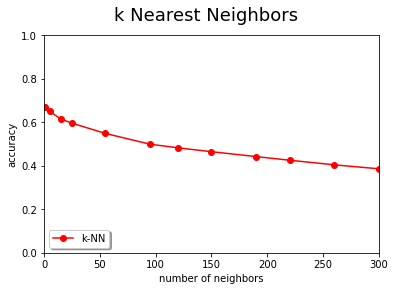

In [30]:
n_neighbors_vals = [1,5, 15,25, 55, 95, 120, 150, 190, 220, 260, 300]
knn_predictions = []

for n in n_neighbors_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_data, train_sln)
    predictions = knn.predict(test_data)
    current_accuracy = metrics.accuracy_score(test_sln,predictions)
    knn_predictions.append(current_accuracy)


plt.suptitle('k Nearest Neighbors',fontsize=18)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors_vals,knn_predictions,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,300,0,1])

plt.show()

__weighted k Nearest Neighbors__

In [31]:
wknn = neighbors.KNeighborsClassifier(weights='distance')
wknn.fit(train_data, train_sln)
predictions = wknn.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.670958904109589


In [32]:
wknn = neighbors.KNeighborsClassifier(weights='distance')
wknn.fit(train_data_normalized, train_sln)
predictions = wknn.predict(test_data_normalized)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.5501369863013699


In [33]:
wknn = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=50)
wknn.fit(train_data, train_sln)
predictions = wknn.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions))

Accuracy: 0.6065753424657534


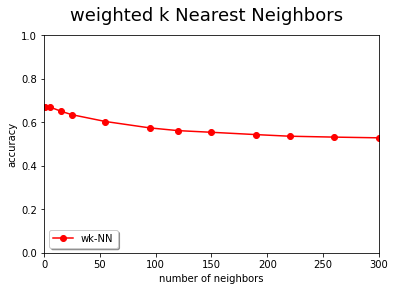

In [34]:
n_neighbors_vals = [1,5, 15,25, 55, 95, 120, 150, 190, 220, 260, 300]
wknn_predictions = []

for n in n_neighbors_vals:
    wknn = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=n)
    wknn.fit(train_data, train_sln)
    predictions = wknn.predict(test_data)
    current_accuracy = metrics.accuracy_score(test_sln,predictions)
    wknn_predictions.append(current_accuracy)


plt.suptitle('weighted k Nearest Neighbors',fontsize=18)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors_vals,wknn_predictions,'ro-',label='wk-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,300,0,1])

plt.show()

__decision tree__

In [35]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_data, train_sln)
dt_predictions = dt.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,dt_predictions))

Accuracy: 0.7843835616438356


In [36]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_data_normalized, train_sln)
dt_predictions = dt.predict(test_data_normalized)
print("Accuracy:", metrics.accuracy_score(test_sln,dt_predictions))

Accuracy: 0.7857534246575343


In [37]:
dt = tree.DecisionTreeClassifier(max_features=5)
dt.fit(train_data, train_sln)
dt_predictions = dt.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,dt_predictions))

Accuracy: 0.7695890410958904


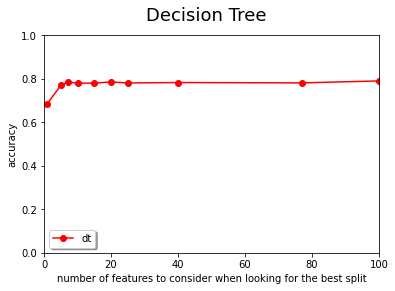

In [38]:
max_features_vals = [1,5,7,10,15,20,25,40,77,100]
dt_predictions = []

for n in max_features_vals:
    dt = tree.DecisionTreeClassifier(max_features=n)
    dt.fit(train_data, train_sln)
    predictions = dt.predict(test_data)
    current_accuracy = metrics.accuracy_score(test_sln,predictions)
    dt_predictions.append(current_accuracy)


plt.suptitle('Decision Tree',fontsize=18)
plt.xlabel('number of features to consider when looking for the best split')
plt.ylabel('accuracy')
plt.plot(max_features_vals,dt_predictions,'ro-',label='dt')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,100,0,1])

plt.show()

__random forest__ 

In [39]:
rf = ensemble.RandomForestClassifier()
rf.fit(train_data, train_sln)
rf_predictions = rf.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,rf_predictions))

Accuracy: 0.8961643835616439


In [40]:
rf = ensemble.RandomForestClassifier()
rf.fit(train_data_normalized, train_sln)
rf_predictions = rf.predict(test_data_normalized)
print("Accuracy:", metrics.accuracy_score(test_sln,rf_predictions))

Accuracy: 0.8997260273972603


In [41]:
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(train_data, train_sln)
rf_predictions = rf.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,rf_predictions))

Accuracy: 0.8682191780821917


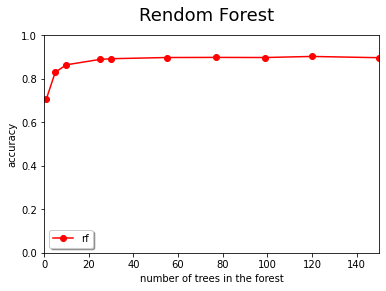

In [42]:
n_estimators_vals = [1,5,10, 25, 30, 55, 77, 99, 120, 150]
rf_predictions = []

for n in n_estimators_vals:
    rf = ensemble.RandomForestClassifier(n_estimators=n)
    rf.fit(train_data, train_sln)
    predictions = rf.predict(test_data)
    current_accuracy = metrics.accuracy_score(test_sln,predictions)
    rf_predictions.append(current_accuracy)


plt.suptitle('Rendom Forest',fontsize=18)
plt.xlabel('number of trees in the forest')
plt.ylabel('accuracy')
plt.plot(n_estimators_vals,rf_predictions,'ro-',label='rf')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,150,0,1])

plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |  Accuracy: 0.65    | Accuracy: 0.48 | n_neighbors Accuracy: 0.55|
| w-kNN         |  Accuracy: 0.67    | Accuracy: 0.55 | n_neighbors Accuracy: 0.61|
| decision tree |  Accuracy: 0.78    | Accuracy: 0.79 | max_features Accuracy: 0.77|
| random forest |  Accuracy: 0.8978  | Accuracy: 0.9  | n_estimators Accuracy: 0.87|

The best performing model was Random Forest as it had the highest acccuracy and was the most consistent in its correct predictions, whether the parameters were normalized or not. Both k Nearest Neighbors and weighted k Nearest Neighbors turned out to be less accurate as the number of neigbors increased. These two models performed the worst. The decision tree model had a rapid increase in accuracy when the number of features to consider when looking for the best split got a little bigger, but after that the accuracy remained roughly the same. The same applies to the random forest model and number of trees. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The dataset I chose for my project was alredy clean so the data prepearation process was not as difficult as the mere process of finding an interesting dataset. 

Choosing which parameters to tune in my experiments turned out to be quite challenging.

I also had toruble creating graphs but I used the code from notebook #3. 